# Exploring Dandiset 001276: NG-CANCAN Remote Targeting Electroporation

**Note: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

## Introduction

This notebook demonstrates how to explore and analyze data from Dandiset 001276: "NG-CANCAN Remote Targeting Electroporation: Impact of Burst Number Variation on Permeabilization Distribution in Confluent Cell Monolayers" created by Giedre Silkuniene, Mantas Silkunas, and Andrei Pakhomov.

### About the Dataset

This Dandiset contains data from experiments investigating the effects of varying burst numbers in CANCAN (CANcellation with CANcelling pulses) electroporation protocols on permeabilization distribution in cell monolayers. The experiments used a four-electrode array with an inter-electrode distance of 10.0 mm.

Key aspects of the study:

* The CANCAN protocols used canceling pulses to minimize cell damage near the electrodes while targeting cells in the center of the electrode array
* Each single pulse in the protocol had a duration of 600 ns
* The protocol consisted of nine packets of pulses delivered at a 0.2 MHz frequency
* The protocol was repeated 1, 2, 4, or 6 times at a 1 Hz frequency
* Cell monolayer integrity was assessed using Hoechst staining (DAPI channel)
* Membrane permeability was evaluated using YoPro-1 staining (FITC channel)

## Required Packages

To run this notebook, you'll need the following packages:
* pynwb
* lindi
* matplotlib
* numpy
* dandi

**Installation Instructions (if needed):**
```
pip install pynwb lindi matplotlib numpy dandi
```

In [1]:
# Import required packages
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
from dandi.dandiapi import DandiAPIClient

# Set up plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Exploring the Dandiset

Let's start by connecting to the DANDI Archive API and retrieving information about this Dandiset.

In [2]:
# Connect to the DANDI API
client = DandiAPIClient()
dandiset = client.get_dandiset("001276")

# Display basic information
print(f"Dandiset name: {dandiset.version.name}")
print(f"Number of files: {dandiset.version.asset_count}")

# Get metadata to extract other information
metadata = dandiset.get_raw_metadata()
num_subjects = metadata.get('numberOfSubjects', 'Unknown')
print(f"Number of subjects: {num_subjects}")
print(f"Dataset DOI: https://doi.org/10.80507/dandi.{dandiset.identifier}")

Dandiset name: NG-CANCAN Remote Targeting Electroporation: Impact of Burst Number Variation on Permeabilization Distribution in Confluent Cell Monolayers
Number of files: 108
Number of subjects: Unknown
Dataset DOI: https://doi.org/10.80507/dandi.001276


## Exploring the Assets in the Dataset

The dataset contains NWB files containing images from experiments. Let's list the assets and understand their organization.

In [3]:
# List all assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"Total number of assets: {len(assets)}")

# Display the first few assets to understand the naming pattern
for asset in assets[:5]:
    print(f"Path: {asset.path}")
    print(f"Size: {asset.size / (1024*1024):.2f} MB")
    print(f"Asset ID: {asset.identifier}")
    print("-" * 50)

Total number of assets: 108
Path: sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb
Size: 356.11 MB
Asset ID: d22476ad-fa18-4aa0-84bf-13fd0113a52c
--------------------------------------------------
Path: sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb
Size: 396.05 MB
Asset ID: 5a8061d9-3757-4a86-8542-2ae90133fdcd
--------------------------------------------------
Path: sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
Size: 449.24 MB
Asset ID: 95141d7a-82aa-4552-940a-1438a430a0d7
--------------------------------------------------
Path: sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb
Size: 451.94 MB
Asset ID: 90ab1ffc-03ff-4193-8e47-9bbfbfd56bb5
--------------------------------------------------
Path: sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb
Size: 451.89 MB
Asset ID: e671bd0e-531d-4219-b38b-480d6179a7fc
--------------------------------------------------


## Understanding the Dataset Structure

The dataset is organized by subject ID, where each subject represents a different experimental setup or condition. Let's analyze the organization of the assets to better understand the structure.

In [4]:
# Analyze asset paths to understand the structure
subjects = set()
obj_patterns = set()

# Extract unique subject IDs
for asset in assets:
    path = asset.path
    parts = path.split('/')
    subject = parts[0]  # This should be the subject identifier
    subjects.add(subject)
    
    # Check for patterns in the filenames
    filename = parts[-1]  # This is the filename
    if 'obj-' in filename:
        obj_id = filename.split('obj-')[1].split('_')[0]
        obj_patterns.add(obj_id)

print(f"Number of unique subjects: {len(subjects)}")
print(f"Example subjects: {list(subjects)[:5]}")
print(f"Number of unique object patterns: {len(obj_patterns)}")
print(f"Example object patterns: {list(obj_patterns)[:5]}")

Number of unique subjects: 54
Example subjects: ['sub-P3-20240827-A1', 'sub-P1-20240703-A2', 'sub-P3-20240813-B1', 'sub-P1-20240813-B1', 'sub-P1-20240827-A2']
Number of unique object patterns: 107
Example object patterns: ['f0m2f7', '11jj6uw', '1dtoxbs', 'um0wpf', 'dae57j']


## Loading and Exploring an NWB File

Now, let's examine a specific NWB file from the dataset. For this example, we'll look at a pair of files from the same subject that represent pre-exposure (DAPI channel) and post-exposure (FITC channel) images.

We'll use `lindi` to load the NWB files, which allows efficient remote access to the data without downloading the entire file.

In [5]:
# Define the specific assets we want to examine
# These are from subject P1-20240627-A2
dapi_asset_id = "95141d7a-82aa-4552-940a-1438a430a0d7"  # DAPI (pre-exposure) file
dapi_path = "sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb"

fitc_asset_id = "d22476ad-fa18-4aa0-84bf-13fd0113a52c"  # FITC (post-exposure) file
fitc_path = "sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb"

Let's first load and explore the DAPI (pre-exposure) file, which shows nuclei stained with Hoechst.

In [6]:
# Load the DAPI image file
dapi_lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/001276/assets/{dapi_asset_id}/nwb.lindi.json"
dapi_f = lindi.LindiH5pyFile.from_lindi_file(dapi_lindi_url)
dapi_nwb = pynwb.NWBHDF5IO(file=dapi_f, mode='r').read()

# Display basic metadata
print(f"NWB identifier: {dapi_nwb.identifier}")
print(f"Session start time: {dapi_nwb.session_start_time}")
print(f"Subject ID: {dapi_nwb.subject.subject_id}")
print(f"Species: {dapi_nwb.subject.species}")

NWB identifier: 441cb2b5-170d-4539-8f1f-731a5d1b3759
Session start time: 2024-12-12 14:41:58.197201-05:00
Subject ID: P1_20240627_A2
Species: http://purl.obolibrary.org/obo/NCBITaxon_10090


/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Now, let's examine the image data in the DAPI file. The data is stored as an `ImageSeries` in the NWB file's acquisition section.

In [7]:
# Examine the DAPI image data structure
dapi_img = dapi_nwb.acquisition["SingleTimePointImaging"]
print(f"Image data type: {type(dapi_img).__name__}")
print(f"Image dimensions: {dapi_img.data.shape}")
print(f"Data type: {dapi_img.data.dtype}")

# Extract a small sample from the center of the image to avoid loading the entire large image
dapi_shape = dapi_img.data.shape
if len(dapi_shape) == 3:  # (frames, height, width)
    frame_idx, height, width = 0, dapi_shape[1], dapi_shape[2]
    # Extract a central 1000x1000 region
    crop_size = min(1000, height, width)
    start_h = (height - crop_size) // 2
    start_w = (width - crop_size) // 2
    dapi_sample = dapi_img.data[frame_idx, start_h:start_h+crop_size, start_w:start_w+crop_size]
elif len(dapi_shape) == 2:  # (height, width)
    height, width = dapi_shape
    # Extract a central 1000x1000 region
    crop_size = min(1000, height, width)
    start_h = (height - crop_size) // 2
    start_w = (width - crop_size) // 2
    dapi_sample = dapi_img.data[start_h:start_h+crop_size, start_w:start_w+crop_size]
    
print(f"Sample dimensions: {dapi_sample.shape}")

# Basic statistics on the sample
print(f"Sample min value: {np.min(dapi_sample)}")
print(f"Sample max value: {np.max(dapi_sample)}")
print(f"Sample mean value: {np.mean(dapi_sample):.2f}")

Image data type: ImageSeries
Image dimensions: (1, 19190, 19190)
Data type: uint16


Sample dimensions: (1000, 1000)
Sample min value: 1527
Sample max value: 65535
Sample mean value: 4152.63


Now, let's visualize the DAPI sample, which shows the nuclei of cells stained with Hoechst. This provides information about the location and density of cells in the monolayer.

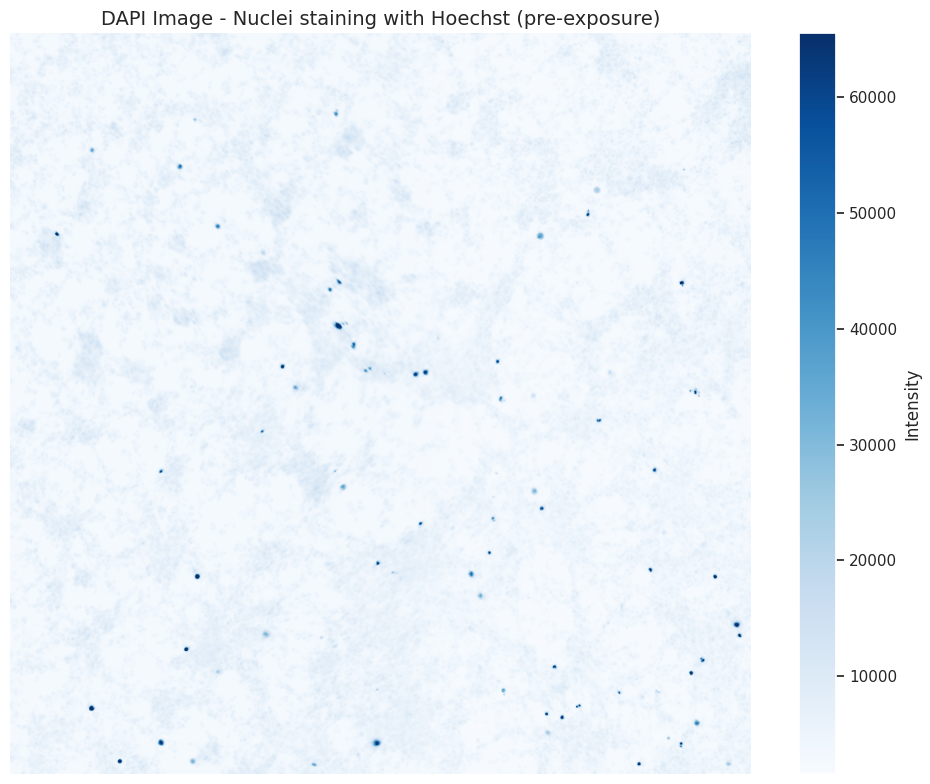

In [8]:
# Visualize the DAPI sample
plt.figure(figsize=(10, 8))
plt.imshow(dapi_sample, cmap='Blues')
plt.colorbar(label="Intensity")
plt.title("DAPI Image - Nuclei staining with Hoechst (pre-exposure)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

Now, let's load and examine the FITC (post-exposure) file, which shows YoPro-1 uptake, indicating membrane permeabilization.

In [9]:
# Load the FITC image file
fitc_lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/001276/assets/{fitc_asset_id}/nwb.lindi.json"
fitc_f = lindi.LindiH5pyFile.from_lindi_file(fitc_lindi_url)
fitc_nwb = pynwb.NWBHDF5IO(file=fitc_f, mode='r').read()

# Examine the FITC image data structure
fitc_img = fitc_nwb.acquisition["SingleTimePointImaging"]
print(f"Image dimensions: {fitc_img.data.shape}")

# Extract a sample from the center (same region as the DAPI image)
fitc_shape = fitc_img.data.shape
if len(fitc_shape) == 3:  # (frames, height, width)
    frame_idx, height, width = 0, fitc_shape[1], fitc_shape[2]
    # Extract a central 1000x1000 region (same as DAPI)
    crop_size = min(1000, height, width)
    start_h = (height - crop_size) // 2
    start_w = (width - crop_size) // 2
    fitc_sample = fitc_img.data[frame_idx, start_h:start_h+crop_size, start_w:start_w+crop_size]
elif len(fitc_shape) == 2:  # (height, width)
    height, width = fitc_shape
    # Extract a central 1000x1000 region (same as DAPI)
    crop_size = min(1000, height, width)
    start_h = (height - crop_size) // 2
    start_w = (width - crop_size) // 2
    fitc_sample = fitc_img.data[start_h:start_h+crop_size, start_w:start_w+crop_size]
    
# Basic statistics on the sample
print(f"FITC sample min value: {np.min(fitc_sample)}")
print(f"FITC sample max value: {np.max(fitc_sample)}")
print(f"FITC sample mean value: {np.mean(fitc_sample):.2f}")

Image dimensions: (1, 19190, 19190)


FITC sample min value: 373
FITC sample max value: 46156
FITC sample mean value: 1576.95


Let's visualize the FITC sample, showing YoPro-1 uptake, which indicates membrane permeabilization due to the electroporation treatment.

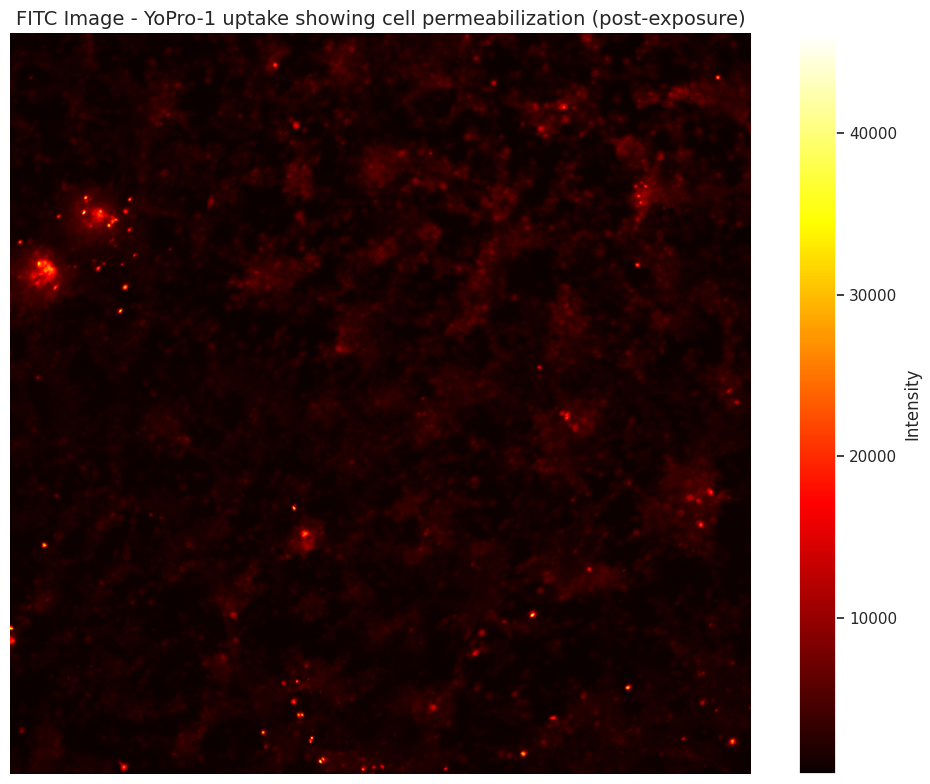

In [10]:
# Visualize the FITC sample
plt.figure(figsize=(10, 8))
plt.imshow(fitc_sample, cmap='hot')
plt.colorbar(label="Intensity")
plt.title("FITC Image - YoPro-1 uptake showing cell permeabilization (post-exposure)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

## Side-by-Side Comparison: DAPI vs. FITC

Now that we have both images, let's create a side-by-side comparison of the DAPI (pre-exposure) and FITC (post-exposure) images. This will help us visualize the relationship between cell locations and membrane permeabilization.

For better visualization, we'll normalize both images to the range [0, 1].

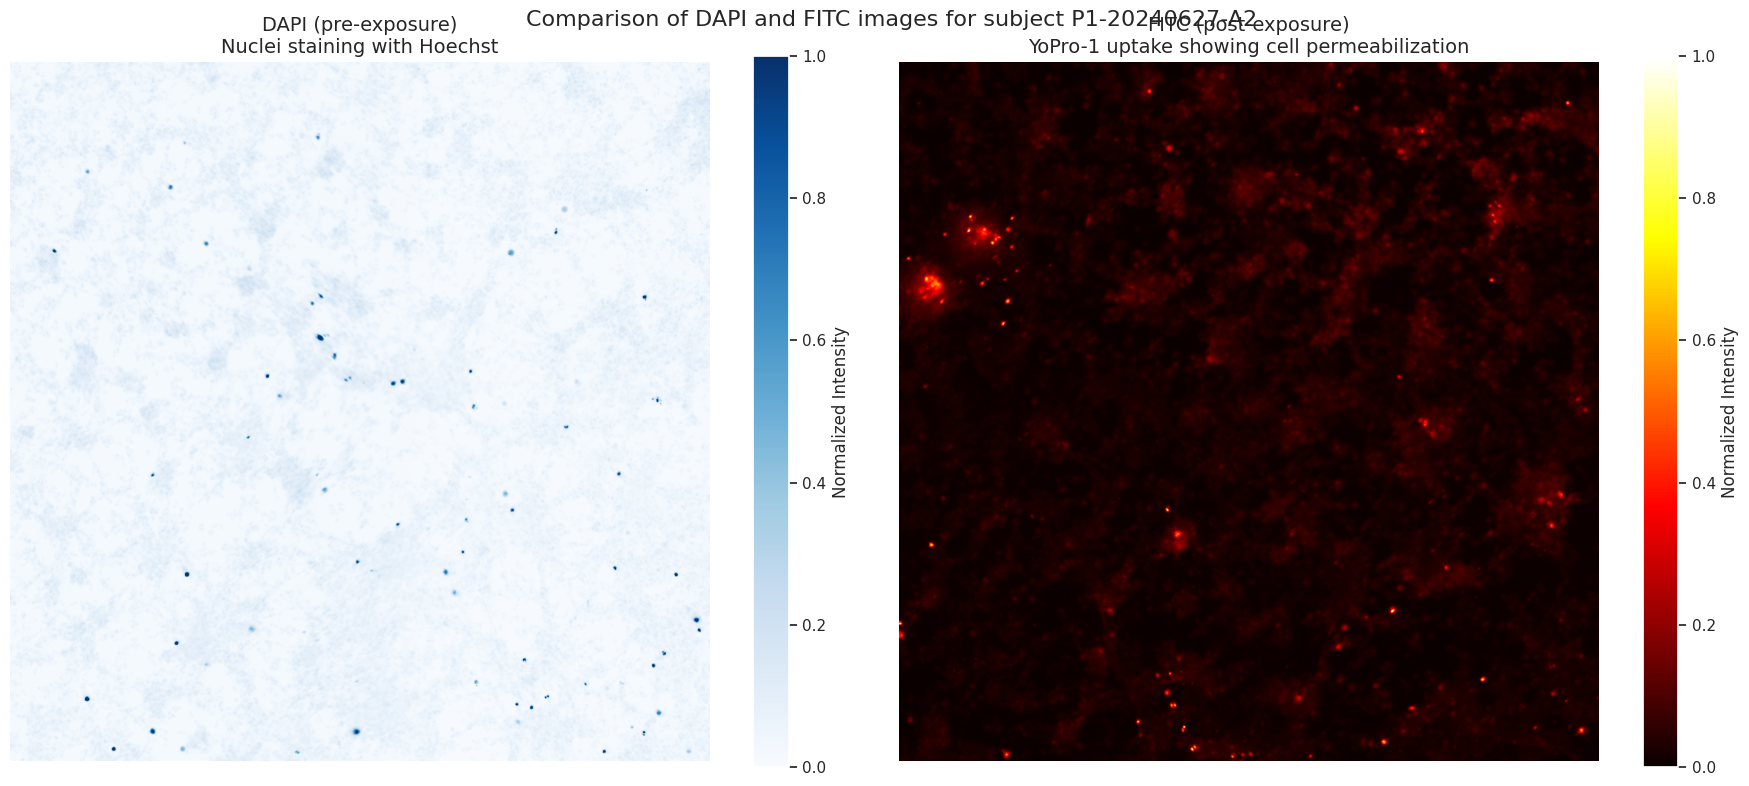

In [11]:
# Normalize the samples for visualization
def normalize_sample(sample):
    sample_min = np.min(sample)
    sample_max = np.max(sample)
    if sample_min != sample_max:
        return (sample - sample_min) / (sample_max - sample_min)
    else:
        return np.zeros_like(sample)

dapi_norm = normalize_sample(dapi_sample)
fitc_norm = normalize_sample(fitc_sample)

# Create side-by-side comparison
plt.figure(figsize=(18, 8))

# DAPI image (nuclei staining, pre-exposure)
plt.subplot(1, 2, 1)
plt.imshow(dapi_norm, cmap='Blues')
plt.title("DAPI (pre-exposure)\nNuclei staining with Hoechst", fontsize=14)
plt.axis('off')
plt.colorbar(label="Normalized Intensity")

# FITC image (YoPro-1, post-exposure)
plt.subplot(1, 2, 2)
plt.imshow(fitc_norm, cmap='hot')
plt.title("FITC (post-exposure)\nYoPro-1 uptake showing cell permeabilization", fontsize=14)
plt.axis('off')
plt.colorbar(label="Normalized Intensity")

plt.suptitle("Comparison of DAPI and FITC images for subject P1-20240627-A2", fontsize=16)
plt.tight_layout()
plt.show()

## Creating a Composite Image

To better understand the relationship between cell nuclei locations and membrane permeabilization, let's create a composite image that shows both channels together. We'll use the blue channel for DAPI (nuclei) and the green channel for FITC (permeabilization).

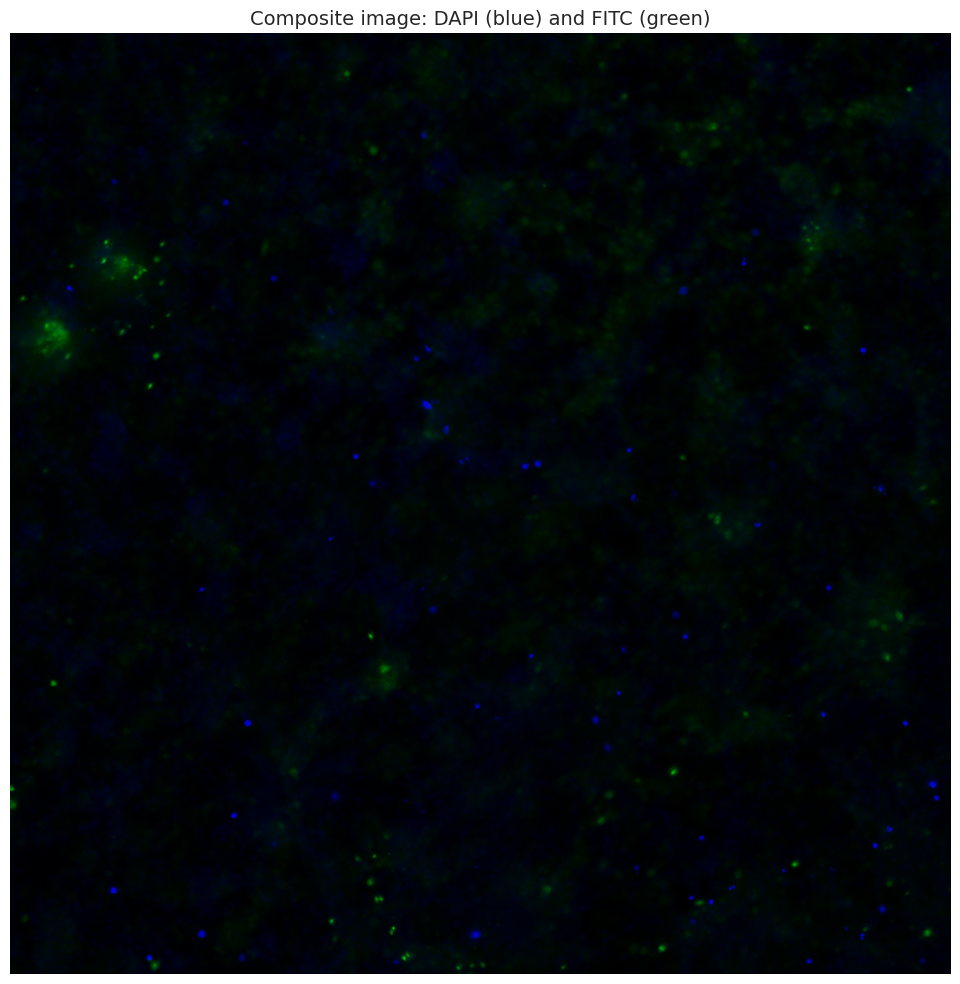

In [12]:
# Create composite image (DAPI in blue channel, FITC in green)
if dapi_norm.shape == fitc_norm.shape:
    # Create RGB image
    composite = np.zeros((dapi_norm.shape[0], dapi_norm.shape[1], 3))
    composite[:,:,0] = 0                  # Red channel empty
    composite[:,:,1] = fitc_norm * 0.8    # Green channel for FITC
    composite[:,:,2] = dapi_norm * 0.8    # Blue channel for DAPI
    
    plt.figure(figsize=(12, 10))
    plt.imshow(composite)
    plt.title("Composite image: DAPI (blue) and FITC (green)", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Error: DAPI and FITC samples have different shapes, cannot create composite image.")

## Analyzing Intensity Distributions

Let's analyze the intensity distributions of both the DAPI and FITC channels. This can provide insights into the overall pattern of nuclei distribution and membrane permeabilization across the sample.

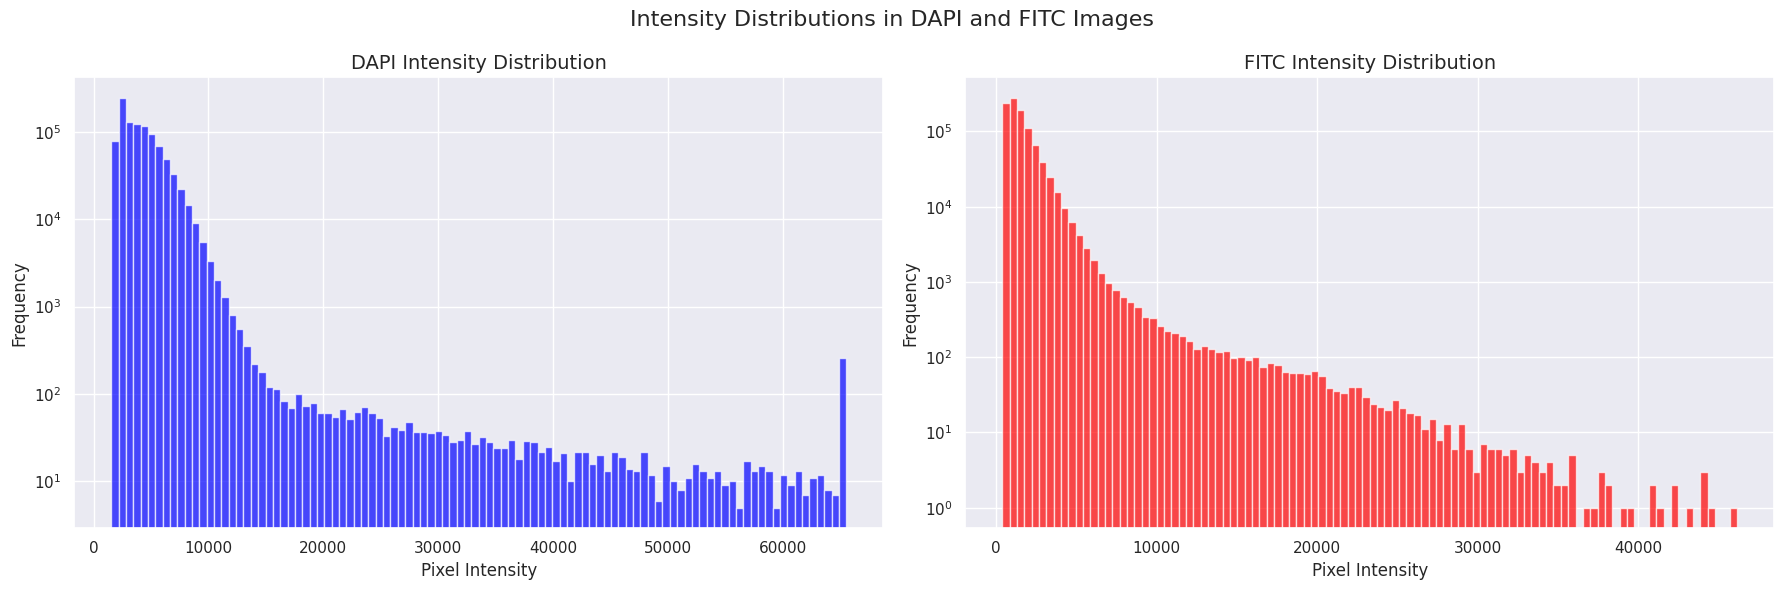

In [13]:
# Generate histograms of pixel intensities
plt.figure(figsize=(18, 6))

# DAPI histogram
plt.subplot(1, 2, 1)
plt.hist(dapi_sample.flatten(), bins=100, alpha=0.7, color='blue')
plt.title("DAPI Intensity Distribution", fontsize=14)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.yscale('log')  # Use log scale for better visualization of distribution

# FITC histogram
plt.subplot(1, 2, 2)
plt.hist(fitc_sample.flatten(), bins=100, alpha=0.7, color='red')
plt.title("FITC Intensity Distribution", fontsize=14)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.yscale('log')  # Use log scale for better visualization of distribution

plt.suptitle("Intensity Distributions in DAPI and FITC Images", fontsize=16)
plt.tight_layout()
plt.show()

## Examining Additional Subjects

Now that we've seen how to work with one subject, let's develop a more general function to fetch and analyze data from any subject in the dataset.

In [14]:
# Function to fetch data for a specific subject
def fetch_subject_data(subject_id, limit=2):
    """
    Fetch NWB files associated with a specific subject.
    
    Parameters:
    -----------
    subject_id : str
        The ID of the subject to fetch data for
    limit : int, optional
        Maximum number of files to fetch (default: 2)
        
    Returns:
    --------
    list
        List of dictionaries containing file information
    """
    subject_files = []
    count = 0
    
    for asset in assets:
        if asset.path.startswith(subject_id + '/'):
            # Get the file info
            asset_id = asset.identifier
            path = asset.path
            
            subject_files.append({
                'subject_id': subject_id,
                'path': path,
                'asset_id': asset_id
            })
            
            count += 1
            if count >= limit:
                break
                
    return subject_files

# Get a list of subject IDs
subject_list = sorted(list(subjects))
print(f"Available subjects: {subject_list[:10]}")  # Show first 10 subjects

Available subjects: ['sub-P1-20240627-A2', 'sub-P1-20240627-A3', 'sub-P1-20240627-B1', 'sub-P1-20240627-B2', 'sub-P1-20240627-B3', 'sub-P1-20240702-A1', 'sub-P1-20240702-A2', 'sub-P1-20240702-A3', 'sub-P1-20240702-B1', 'sub-P1-20240702-B3']


In [15]:
# Let's look at a different subject
new_subject = "sub-P1-20240702-B3"
subject_files = fetch_subject_data(new_subject)

if subject_files:
    print(f"Files found for subject {new_subject}:")
    for file in subject_files:
        print(f"  {file['path']} (asset_id: {file['asset_id']})")
else:
    print(f"No files found for subject {new_subject}")

Files found for subject sub-P1-20240702-B3:
  sub-P1-20240702-B3/sub-P1-20240702-B3_obj-1rnsmhu_image.nwb (asset_id: 84f9d98e-3748-428c-bac7-1e9b2f3d04c2)
  sub-P1-20240702-B3/sub-P1-20240702-B3_obj-1vh4bm0_image.nwb (asset_id: c3bc2361-fc62-453b-b093-aff44e81d219)


Next, we can develop a function to load and process images from a subject.

In [16]:
# Function to load and process images for a subject
def process_subject_images(subject_files, crop_size=1000):
    """
    Load and process images for a subject.
    
    Parameters:
    -----------
    subject_files : list
        List of dictionaries containing file information
    crop_size : int, optional
        Size of the central crop to extract (default: 1000)
        
    Returns:
    --------
    dict
        Dictionary containing the processed images and metadata
    """
    results = {'subject_id': subject_files[0]['subject_id'], 'images': []}
    
    for file_info in subject_files:
        asset_id = file_info['asset_id']
        path = file_info['path']
        
        try:
            # Load the file
            lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/001276/assets/{asset_id}/nwb.lindi.json"
            f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
            nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
            
            # Determine image type (DAPI/FITC) from description
            description = nwb.session_description
            is_dapi = "DAPI" in description and "pre" in description
            is_fitc = "FITC" in description and "post" in description
            
            if is_dapi:
                img_type = "DAPI"
            elif is_fitc:
                img_type = "FITC"
            else:
                img_type = "Unknown"
                
            # Get the image data
            img_data = nwb.acquisition["SingleTimePointImaging"]
            shape = img_data.data.shape
            
            # Extract a central crop
            if len(shape) == 3:  # (frames, height, width)
                n_frames, height, width = shape
                crop_size = min(crop_size, height, width)
                start_h = (height - crop_size) // 2
                start_w = (width - crop_size) // 2
                sample = img_data.data[0, start_h:start_h+crop_size, start_w:start_w+crop_size]
            elif len(shape) == 2:  # (height, width)
                height, width = shape
                crop_size = min(crop_size, height, width)
                start_h = (height - crop_size) // 2
                start_w = (width - crop_size) // 2
                sample = img_data.data[start_h:start_h+crop_size, start_w:start_w+crop_size]
                
            # Save the result
            results['images'].append({
                'path': path,
                'type': img_type,
                'description': description[:100] + "...",
                'sample': sample,
                'shape': shape,
                'min': np.min(sample),
                'max': np.max(sample),
                'mean': np.mean(sample)
            })
            
        except Exception as e:
            print(f"Error processing {path}: {str(e)}")
            
    return results

# Process the new subject's images
new_subject_data = process_subject_images(subject_files)

Now we can visualize the images for the new subject.

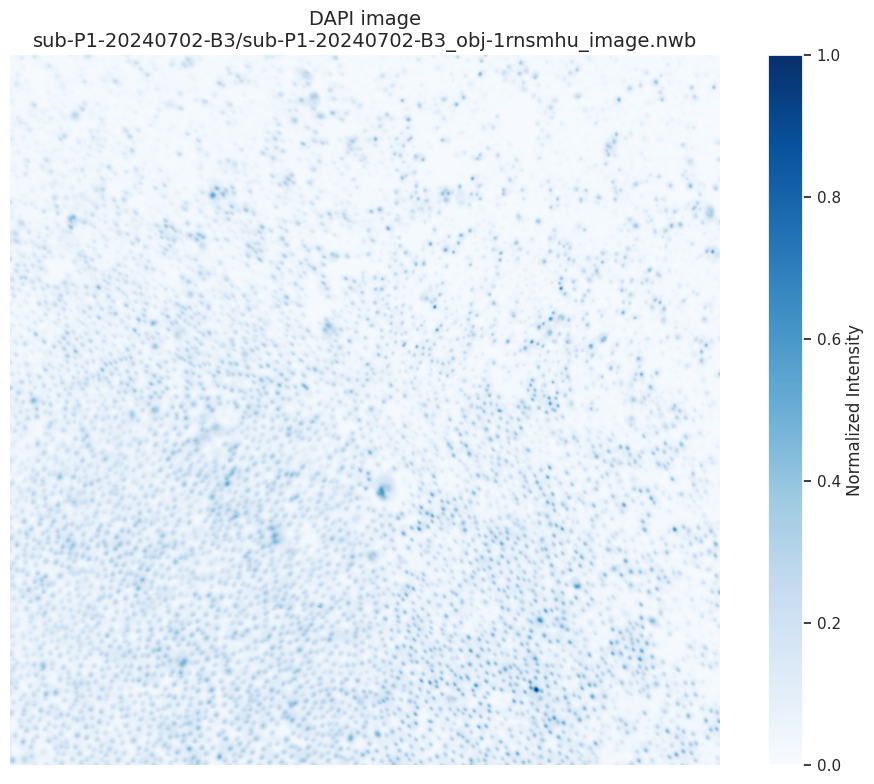

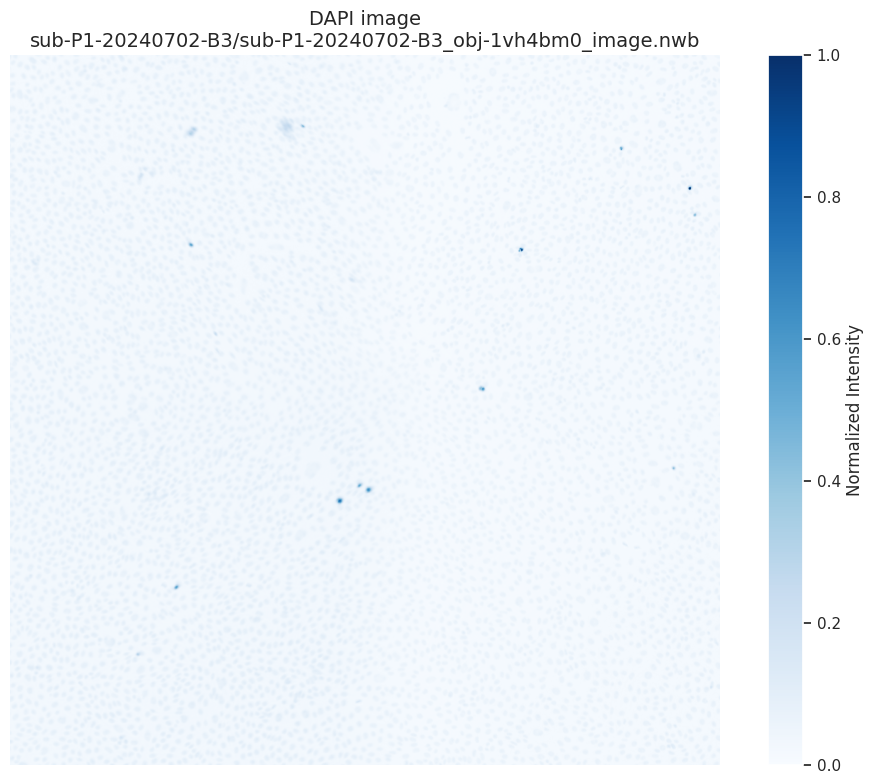

In [17]:
# Function to visualize a subject's images
def visualize_subject_images(subject_data):
    """
    Visualize images for a subject.
    
    Parameters:
    -----------
    subject_data : dict
        Dictionary containing the processed images and metadata
    """
    # Find DAPI and FITC images
    dapi_image = None
    fitc_image = None
    
    for img in subject_data['images']:
        if img['type'] == 'DAPI':
            dapi_image = img
        elif img['type'] == 'FITC':
            fitc_image = img
    
    # If we have both DAPI and FITC, create a comparison
    if dapi_image and fitc_image:
        # Normalize the samples
        dapi_norm = normalize_sample(dapi_image['sample'])
        fitc_norm = normalize_sample(fitc_image['sample'])
        
        # Create comparison plot
        plt.figure(figsize=(18, 8))
        
        # DAPI image
        plt.subplot(1, 2, 1)
        plt.imshow(dapi_norm, cmap='Blues')
        plt.title(f"DAPI image\n{dapi_image['path']}", fontsize=14)
        plt.axis('off')
        plt.colorbar(label="Normalized Intensity")
        
        # FITC image
        plt.subplot(1, 2, 2)
        plt.imshow(fitc_norm, cmap='hot')
        plt.title(f"FITC image\n{fitc_image['path']}", fontsize=14)
        plt.axis('off')
        plt.colorbar(label="Normalized Intensity")
        
        plt.suptitle(f"Images for subject: {subject_data['subject_id']}", fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Create composite image
        if dapi_norm.shape == fitc_norm.shape:
            composite = np.zeros((dapi_norm.shape[0], dapi_norm.shape[1], 3))
            composite[:,:,0] = 0                  # Red channel empty
            composite[:,:,1] = fitc_norm * 0.8    # Green channel for FITC
            composite[:,:,2] = dapi_norm * 0.8    # Blue channel for DAPI
            
            plt.figure(figsize=(12, 10))
            plt.imshow(composite)
            plt.title(f"Composite image for subject: {subject_data['subject_id']}", fontsize=14)
            plt.axis('off')
            plt.tight_layout()
            plt.show()
    else:
        # Just plot the images we have
        for img in subject_data['images']:
            plt.figure(figsize=(10, 8))
            
            # Normalize the sample
            img_norm = normalize_sample(img['sample'])
            
            if img['type'] == 'DAPI':
                cmap = 'Blues'
            elif img['type'] == 'FITC':
                cmap = 'hot'
            else:
                cmap = 'viridis'
                
            plt.imshow(img_norm, cmap=cmap)
            plt.title(f"{img['type']} image\n{img['path']}", fontsize=14)
            plt.colorbar(label="Normalized Intensity")
            plt.axis('off')
            plt.tight_layout()
            plt.show()

# Visualize the new subject's images
visualize_subject_images(new_subject_data)

## Conclusion

In this notebook, we've explored Dandiset 001276, which investigates the effects of varying burst numbers in CANCAN electroporation protocols on cell membrane permeabilization.

Key points from our exploration:

1. The dataset contains paired DAPI (pre-exposure) and FITC (post-exposure) images for multiple subjects
2. DAPI images show cell nuclei stained with Hoechst, indicating cell locations
3. FITC images show YoPro-1 uptake, indicating cell membrane permeabilization from the electroporation treatment
4. By comparing these images, researchers can analyze how the CANCAN protocol affects permeabilization distribution across cell monolayers
5. The composite images allow visualization of both cell locations and permeabilization patterns simultaneously

This analysis helps researchers understand the impact of varying burst numbers on electroporation effectiveness and distribution, which has applications in targeted drug delivery, gene therapy, and other biomedical interventions.

For more detailed analysis, researchers might want to:

* Compare permeabilization patterns across different protocol variations
* Quantify the relationship between cell density and permeabilization efficiency
* Develop segmentation algorithms to identify and count permeabilized vs. non-permeabilized cells
* Create spatial maps of permeabilization effectiveness across the electrode array

**Note: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**